# Import the libraries

In [4]:
# import all necessary libraries
import requests
import json
import sqlite3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Set up the database called 'yelp_spa'

In [5]:
## Create new SQL database
conn = sqlite3.connect('yelp_spa')
cur = conn.cursor()

conn.commit()

    Create a table called 'business'

In [3]:
# Create SQL table for the businesses 
cur.execute("""CREATE TABLE business (
                                id TEXT PRIMARY KEY NOT NULL,
                                name TEXT,
                                is_closed NUMERIC,
                                review_count INTEGER,
                                category_1 TEXT,
                                category_2 TEXT,
                                rating INTEGER, 
                                price TEXT,
                                area TEXT,
                                location_city TEXT,
                                location_zipcode INTEGER)          
            """)
conn.commit()

    Create a table called 'reviews'

In [4]:
# Create SQL table for the reviews
cur.execute("""CREATE TABLE reviews (
                                id TEXT PRIMARY KEY,
                                text TEXT,
                                rating NUMERIC,
                                time_created NUMERIC,
                                business_id TEXT  
                               )          
            """) 

conn.commit()

## Part 2 - Create ETL pipeline for the business and reviews data from the API

    import client_id and api_key from keys.py

In [5]:
from  keys  import  client_id, api_key

    Set up url to pull information from

In [6]:
# assign business API url to a variable
url =  'https://api.yelp.com/v3/businesses/search' 

In [7]:
headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

    Specify business parameters to search for

In [8]:
# what type of business do you want to search
term = 'spa' 

#where do you want to perform this search
location = 'Miami,FL'

# what is your other parameter you want to search against
radius = 40000

In [9]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

    Import functions from functions.py file

In [10]:
from functions import yelp_call, parse_results, db_insert, yelp_review_call, parse_review_results, db_review_insert

    Make a call to the Yelp API, parse the API response and insert in into the 'business' table for the first location

In [11]:
# create a variable to keep track of which result we are in. 
current_offset = 0

# set up a while loop to go through and grab the result 
while current_offset < 1000:
    # set the offset parameter to be where we currently are in the results 
    url_params['offset'] = current_offset
    #make API call with the new offset number
    results = yelp_call(url, url_params, api_key)
    
    # use the function to parse results
    parsed_results = parse_results(results, location)
    
    # use the function to insert parsed results into the db
    db_insert(conn, cur, parsed_results)
    print(current_offset) # to check that the code works
    
    #increment the counter by 50 to move on to the next results
    current_offset += 50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [12]:
Miami_total_spa_count = results['total']
Miami_total_spa_count

2800

    Specify the second location

In [13]:
# change location to perform the second search
location = 'Orlando,FL'

In [14]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

    Make a call to the Yelp API, parse the API response and insert in into the 'business' table for the second location

In [15]:
# create a variable  to keep track of which result you are in. 
current_offset = 0

#set up a while loop to go through and grab the result 
while current_offset < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = yelp_call(url, url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = parse_results(results, location)
    
    # use your function to insert your parsed results into the db
    db_insert(conn, cur, parsed_results)
    print(current_offset) # to check that the code works
    #increment the counter by 50 to move on to the next results
    current_offset += 50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [16]:
Orlando_total_spa_count = results['total']
Orlando_total_spa_count

1700

    Create a list of all business IDs to pull reviews for

In [17]:
# create a list of all business IDs in the business DB
query = ("SELECT id FROM business ")
cur.execute(query)
business_ID_list = cur.fetchall()

    Make a call to the Yelp API, parse the API response and insert in into the 'reviews' table for all businesses in the 'business' table

In [18]:
# create a variable  to keep track of which result we are in. 
count = 0

#set up a while loop to go through all business IDs and grab the result of reviews
for biz_id in business_ID_list:
    biz_id = biz_id[0]

    #make API call with the business ID
    review_results = yelp_review_call(biz_id)
    
    #after we get the results, use this function to parse those results
    parsed_review_results = parse_review_results(review_results, biz_id)
    
    # use the function to insert parsed results into the db
    if parsed_review_results == None:
        pass
    else:
        db_review_insert(conn, cur, parsed_review_results)
        
    count += 1
    
    if count % 100 == 0: # to check that the code works
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


## Part 3 - Pull in  data into the python environment.

In [6]:
cur.execute("SELECT * from business")
business_data = pd.DataFrame(cur.fetchall())
business_data.columns = [x[0] for x in cur.description]
business_data

,id,name,is_closed,review_count,category_1,category_2,rating,price,area,location_city,location_zipcode
0,nNLKoINrGTcwPYznO0afNA,Tao Spa Miami,0,215,Massage,Skin Care,4.5,$$,"Miami,FL",Miami Beach,33139
1,HrTHjKD-zbS2GvbDCeS54Q,Biltmore Spa,0,101,Day Spas,Hair Salons,4.0,$$$,"Miami,FL",Coral Gables,33134
2,ImwHmojjWspwyItzRZxd7A,The Spa at Mandarin Oriental,0,73,Day Spas,Massage,4.0,$$$$,"Miami,FL",Miami,33131
3,WcURjIVEINE-Y24WLpezAA,Lapis Spa,0,296,Day Spas,Hair Salons,4.0,$$$,"Miami,FL",Miami Beach,33140
4,_ia42yHh93ZT3nBUHqah2w,ME SPA Pembroke Pines,0,86,Day Spas,Massage,4.5,$$,"Miami,FL",Pembroke Pines,33027
...,...,...,...,...,...,...,...,...,...,...,...
1995,xhuhqcT1w359I0kPHv6XLA,Central Florida Oral and Maxillofacial Surgery PA,0,28,Oral Surgeons,Medical Spas,4.0,$$$,"Orlando,FL",Orlando,32803
1996,f3bbq3dzv7LQQcy5lLymxQ,Bahama Nails,0,5,Nail Salons,None,5.0,$$,"Orlando,FL",Oviedo,32765
1997,Kt4QV1Allxvt4wKnl8JYcg,Maxim Nails & Day Spa,0,183,Nail Salons,Day Spas,3.0,$$,"Orlando,FL",Orlando,32828
1998,H9ecHY0DX19lqlnNO5xnDw,Venetian Nail Spa - Hamlin,0,39,Waxing,Nail Salons,4.0,None,"Orlando,FL",Winter Garden,34787


In [7]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2000 non-null   object 
 1   name              2000 non-null   object 
 2   is_closed         2000 non-null   int64  
 3   review_count      2000 non-null   int64  
 4   category_1        2000 non-null   object 
 5   category_2        1506 non-null   object 
 6   rating            2000 non-null   float64
 7   price             1064 non-null   object 
 8   area              2000 non-null   object 
 9   location_city     2000 non-null   object 
 10  location_zipcode  2000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 172.0+ KB


In [8]:
business_data['is_closed'].value_counts()  # to check if any businesses have closed

0    2000
Name: is_closed, dtype: int64

In [9]:
cur.execute("SELECT * from reviews")
reviews_data = pd.DataFrame(cur.fetchall())
reviews_data.columns = [x[0] for x in cur.description]
reviews_data

,id,text,rating,time_created,business_id
0,CymB81wlWv0Z-RS3kPaMfA,I was feeling down and felt I had some type of...,5,2020-11-15 09:48:51,-4CWLN_ZIWC3dfIWbFHisw
1,wy3NtldU5z0mPVlELFu_XQ,I honestly don't have anything bad to say abou...,5,2020-11-01 12:00:37,-51v1nSIQvqbYfILt8BSKw
2,pmSDNCahkAjoicOSyF6weg,Update - made an appointment for 330. Checked ...,1,2020-12-30 12:30:20,-51v1nSIQvqbYfILt8BSKw
3,UhXhG7GTUH8S-66cbPSabQ,First time visiting this place and it was amaz...,5,2021-01-01 14:02:15,-51v1nSIQvqbYfILt8BSKw
4,yeKGoi3UKVSV6FY3x_QLjw,My daughter went to a party here and loved it ...,5,2018-03-24 14:09:14,-6WOo-7oDbq9UMgNQmo4BQ
...,...,...,...,...,...
5185,d6xLZUGnvNTegiQJa71jfw,After looking for a location where I can regul...,5,2017-02-10 16:03:11,zwLEQ5nET8c1BDIHHOQ5YQ
5186,ExYUxbvcVi-yw_cKSfR5eQ,"""First off, $24 for a one-hour massage is unbe...",5,2015-09-18 15:55:40,zwLEQ5nET8c1BDIHHOQ5YQ
5187,6ebVJal8wW-PHm7dXJiLWw,My experience with Miami acupuncture and class...,5,2019-04-07 13:01:18,zygj7nRfUhVvMpmaET-TaQ
5188,SPi-gRENbKrkZU3-_VdW4w,Although I was skeptical and an emotional cli...,5,2018-05-17 12:52:19,zygj7nRfUhVvMpmaET-TaQ


## Part 4 - Data analysis and visualizations

In [10]:
#  set up visualization styles
sns.set_style('darkgrid')
sns.set_context('talk')

In [24]:
# to count how many businesses in 'area' == 'Miami,FL' have no price information
business_data[business_data['area'] == 'Miami,FL']['price'].isna().sum()

469

In [25]:
business_data[business_data['area'] == 'Miami,FL'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
id                  1000 non-null object
name                1000 non-null object
is_closed           1000 non-null int64
review_count        1000 non-null int64
category_1          1000 non-null object
category_2          786 non-null object
rating              1000 non-null float64
price               531 non-null object
area                1000 non-null object
location_city       1000 non-null object
location_zipcode    1000 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 93.8+ KB


In [26]:
# to count how many businesses in 'area' == 'Orlando,FL' have no price information
business_data[business_data['area'] == 'Orlando,FL']['price'].isna().sum()

467

In [27]:
business_data[business_data['area'] == 'Orlando,FL'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1000 to 1999
Data columns (total 11 columns):
id                  1000 non-null object
name                1000 non-null object
is_closed           1000 non-null int64
review_count        1000 non-null int64
category_1          1000 non-null object
category_2          720 non-null object
rating              1000 non-null float64
price               533 non-null object
area                1000 non-null object
location_city       1000 non-null object
location_zipcode    1000 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 93.8+ KB


In [28]:
# create a column 'price_text', because values in column 'price' are not recognized in plots
business_data['price_text'] = business_data['price'].map({'$':'1_dollar','$$':'2_dollar',
                                                         '$$$':'3_dollar', '$$$$':'4_dollar'})

In [29]:
# create a column 'price_tier': low_tier is $, mid_tier is $$, high_tier is $$$ and $$$$
business_data['price_tier'] = business_data['price'].map({'$':'low_tier','$$':'mid_tier',
                                                         '$$$':'high_tier', '$$$$':'high_tier'})

# Initial Findings
    
    We began our analysis by looking at the available datapoint of price tier, rating, business density, categories, zip-code, and review count. Notably, throughout our analysis, if any of these points were unavailable the business was excluded from that aspect of the analysis. What we discovered early on was how highly analogous our chosen markets are.

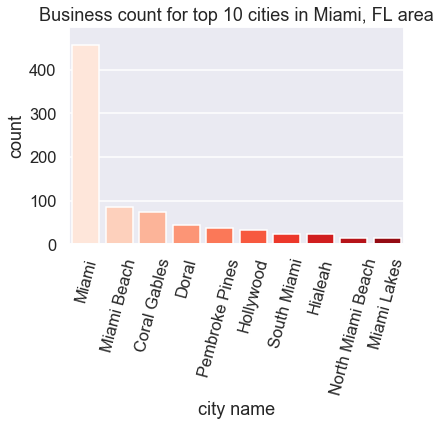

In [30]:
# top 10 cities for area == Miami,FL
g = sns.countplot(x = 'location_city', data = business_data[business_data['area'] == 'Miami,FL'],
    order = business_data[business_data['area'] == 'Miami,FL']['location_city'].value_counts().index[:10],
             palette = 'Reds', saturation = 1)
g.set_title('Business count for top 10 cities in Miami, FL area')
g.set_xlabel('city name')
g.set_ylim(0, 499)
plt.xticks(rotation = 75);

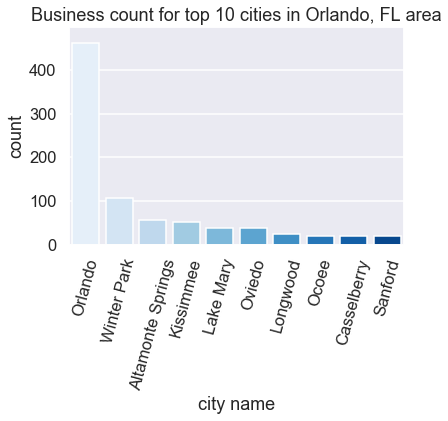

In [31]:
# top 10 cities for area == Orlando,FL
g = sns.countplot(x = 'location_city', data = business_data[business_data['area'] == 'Orlando,FL'],
    order = business_data[business_data['area'] == 'Orlando,FL']['location_city'].value_counts().index[:10],
             palette = 'Blues', saturation = 1)
g.set_title('Business count for top 10 cities in Orlando, FL area')
g.set_xlabel('city name')
g.set_ylim(0, 499)
plt.xticks(rotation = 75);

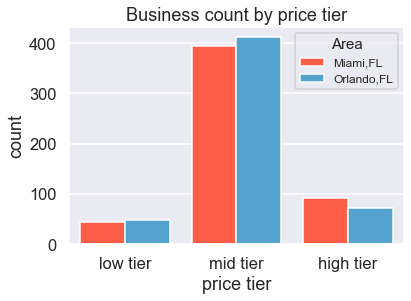

In [32]:
# break out by column price_tier
g = sns.countplot(x = 'price_tier', data = business_data, order = ['low_tier', 'mid_tier', 'high_tier'],
             hue = 'area', palette = ['#fd5e48', '#54a3ce'], saturation = 1)
# excluded price = None. Miami,FL has 469 businesses without price. Orlando,FL has 467 businesses without price.
g.set_title('Business count by price tier')
g.set_xlabel('price tier')
g.set_xticklabels(['low tier', 'mid tier', 'high tier'])
g.legend(fontsize = 12, title = 'Area', title_fontsize='15');

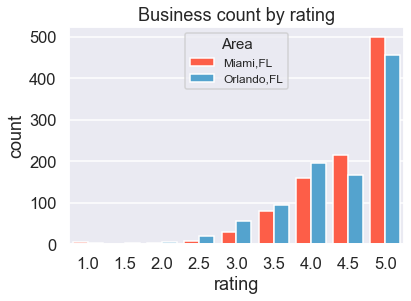

In [33]:
# break out by rating
g = sns.countplot(x = 'rating', data = business_data,
             hue = 'area', palette = ['#fd5e48', '#54a3ce'], saturation = 1)
# no rating NULL
g.set_title('Business count by rating')
g.set_xlabel('rating')
g.legend(fontsize = 12, title = 'Area', title_fontsize='15');

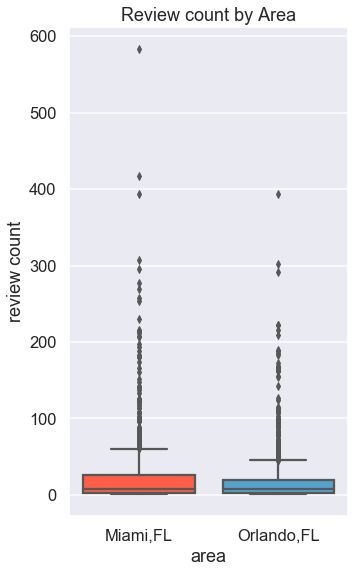

In [34]:
# review_count for all businesses in Miami and Orlando
fig, ax = plt.subplots(figsize = (5, 9))
sns.boxplot(x = 'area', y = 'review_count', data = business_data,
            palette = ['#fd5e48', '#54a3ce'], saturation = 1, ax = ax)
ax.set_title('Review count by Area')
ax.set_ylabel('review count');

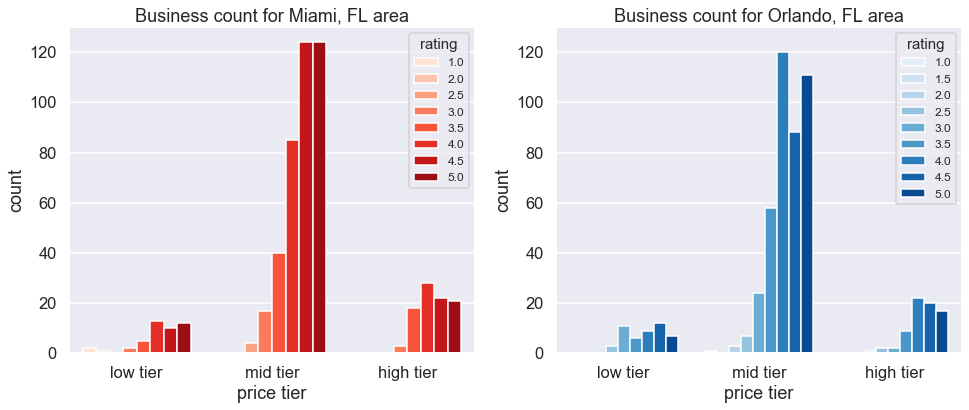

In [35]:
# break out prices by rating for Miami and Orlando
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.countplot(x = 'price_tier', data = business_data[business_data['area'] == 'Miami,FL'],
              order = ['low_tier', 'mid_tier', 'high_tier'], ax = ax[0],
             hue = 'rating', palette = 'Reds', saturation = 1)
sns.countplot(x = 'price_tier', data = business_data[business_data['area'] == 'Orlando,FL'],
              order = ['low_tier', 'mid_tier', 'high_tier'], ax = ax[1],
             hue = 'rating', palette = 'Blues', saturation = 1)
ax[0].set_title('Business count for Miami, FL area')
ax[0].set_xlabel('price tier')
ax[0].set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax[0].set_ylim(0, 130)
ax[0].legend(fontsize = 12, title = 'rating', title_fontsize='15')
ax[1].set_title('Business count for Orlando, FL area')
ax[1].set_xlabel('price tier')
ax[1].set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax[1].set_ylim(0, 130)
ax[1].legend(fontsize = 12, title = 'rating', title_fontsize='15');

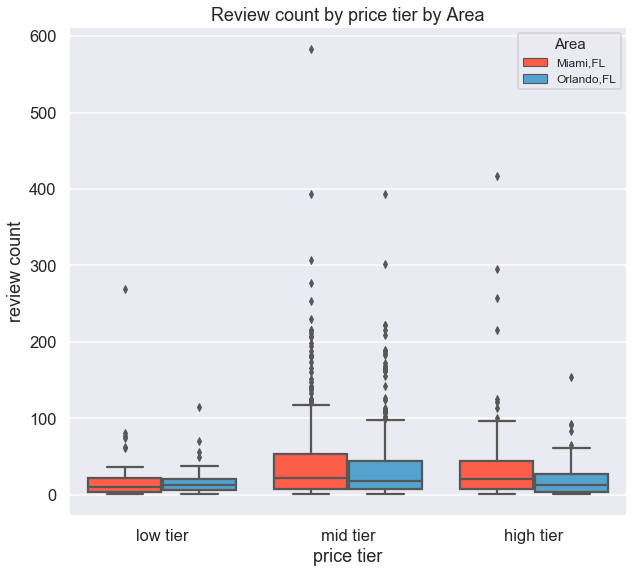

In [36]:
# review_count by price tier for all businesses in Miami and Orlando
fig, ax = plt.subplots(figsize = (10, 9))
sns.boxplot(x = 'price_tier', y = 'review_count', data = business_data, hue = 'area',
            palette = ['#fd5e48', '#54a3ce'], saturation = 1, ax = ax,
           order = ['low_tier', 'mid_tier', 'high_tier'])
ax.set_title('Review count by price tier by Area')
ax.set_xlabel('price tier')
ax.set_ylabel('review count')
ax.set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax.legend(fontsize = 12, title = 'Area', title_fontsize='15');

In [37]:
# create columns category_1_adjusted and category_2_adjusted and map 'Hair Stylists' to 'Hair Salons' and
# 'Massage Therapy' to 'Massage'
business_data['category_1_adjusted'] = business_data['category_1']
business_data['category_1_adjusted'] = business_data['category_1_adjusted'].map({'Hair Stylists':'Hair Salons',
                                'Massage Therapy':'Massage'}).fillna(business_data['category_1'])
business_data['category_2_adjusted'] = business_data['category_2']
business_data['category_2_adjusted'] = business_data['category_2_adjusted'].map({'Hair Stylists':'Hair Salons',
                                'Massage Therapy':'Massage'}).fillna(business_data['category_2'])

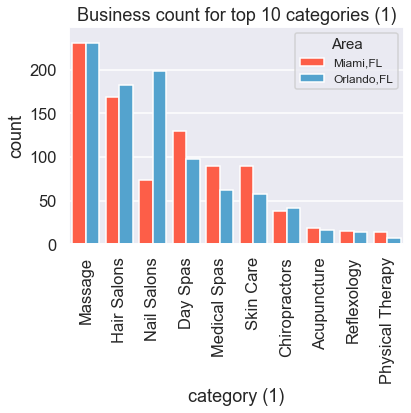

In [38]:
# top 10 break out by category_1_adjusted
g = sns.countplot(x = 'category_1_adjusted', data = business_data,
             hue = 'area', palette = ['#fd5e48', '#54a3ce'], saturation = 1,
              order = business_data['category_1_adjusted'].value_counts().index[:10])
g.set_title('Business count for top 10 categories (1)')
g.set_xlabel('category (1)')
g.set_ylim(0, 249)
g.legend(fontsize = 12, title = 'Area', title_fontsize='15')
plt.xticks(rotation = 90);

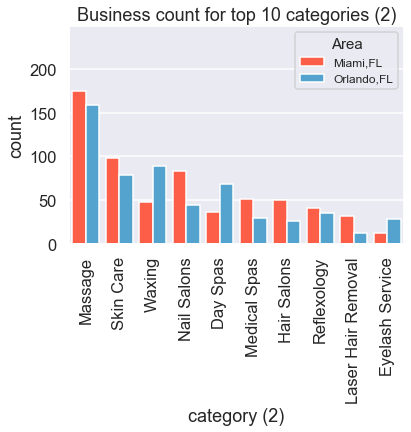

In [39]:
# top 10 break out by category_2
g = sns.countplot(x = 'category_2_adjusted', data = business_data,
             hue = 'area', palette = ['#fd5e48', '#54a3ce'], saturation = 1,
              order = business_data['category_2_adjusted'].value_counts().index[:10])
g.set_title('Business count for top 10 categories (2)')
g.set_xlabel('category (2)')
g.set_ylim(0, 249)
g.legend(fontsize = 12, title = 'Area', title_fontsize='15')
plt.xticks(rotation = 90);

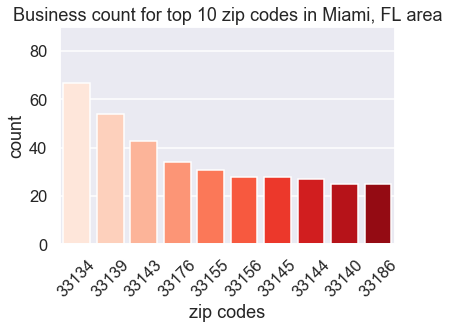

In [40]:
# top 10 zip codes for Miami, FL
g = sns.countplot(x = 'location_zipcode', data = business_data[business_data['area'] == 'Miami,FL'],
    order = business_data[business_data['area'] == 'Miami,FL']['location_zipcode'].value_counts().index[:10],
             palette = 'Reds', saturation = 1)
g.set_title('Business count for top 10 zip codes in Miami, FL area')
g.set_xlabel('zip codes')
g.set_ylim(0, 90)
plt.xticks(rotation = 45);

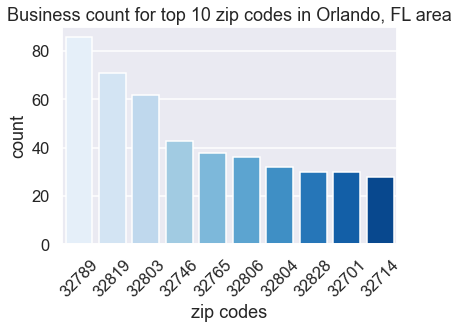

In [12]:
# top 10 zip codes for 'area' = Orlando, FL
g = sns.countplot(x = 'location_zipcode', data = business_data[business_data['area'] == 'Orlando,FL'],
    order = business_data[business_data['area'] == 'Orlando,FL']['location_zipcode'].value_counts().index[:10],
             palette = 'Blues', saturation = 1)
g.set_title('Business count for top 10 zip codes in Orlando, FL area')
g.set_xlabel('zip codes')
g.set_ylim(0, 90)
plt.xticks(rotation = 45);

# Additional data
    Added median income data from incomebyzip.com for Miami-Dade and Orange counties, as well as median income for the top 5 zip codes in each area

In [42]:
# general statistics by county
Miami_Dade_county_population = 2716940
Miami_Dade_county_median_income = 51347
Miami_Dade_county_per_capita_income = 28224
Orange_county_population = 1393452
Orange_county_median_income = 58250
Orange_county_per_capita_income = 30456

# median income for top 5 zipcodes in Yelp's "Miami, FL" area
median33134_income = 68868
median33139_income = 53327
median33143_income = 67042
median33176_income = 72998
median33155_income = 68699

# median income for top 5 zipcodes in Yelp's "Orlando, FL" area
median32789_income = 79759
median32819_income = 73088
median32803_income = 75474
median32746_income = 87581
median32765_income = 81459

In [43]:
median_income_top5zipcodes_Miami_area = (median33134_income + median33139_income +
                                            median33143_income + median33176_income +
                                           median33155_income) / 5
median_income_top5zipcodes_Orlando_area = (median32789_income + median32819_income +
                                            median32803_income + median32746_income +
                                           median32765_income) / 5

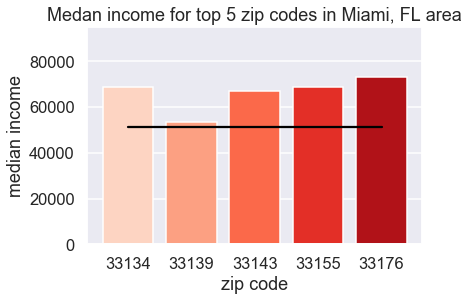

In [44]:
# income for top 5 zipcodes for Miami, FL
fig, ax = plt.subplots()
ax = sns.barplot(x = ['33134','33139', '33143', '33176', '33155'], y = [median33134_income,
                            median33139_income, median33143_income, median33176_income, median33155_income],
                 palette = 'Reds', saturation = 1)
ax = sns.lineplot(x = ['33134','33139', '33143', '33176', '33155'], 
    y = [Miami_Dade_county_median_income, Miami_Dade_county_median_income,
            Miami_Dade_county_median_income, Miami_Dade_county_median_income, Miami_Dade_county_median_income],
                  color = 'black')
ax.set_title('Medan income for top 5 zip codes in Miami, FL area')
ax.set_xlabel('zip code')
ax.set_ylabel('median income')
ax.set_ylim(0,95000);

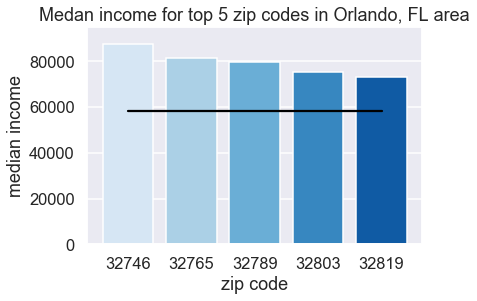

In [45]:
# income for top 5 zipcodes for Orlando, FL
fig, ax = plt.subplots()
ax = sns.barplot(x = ['32789','32819', '32803', '32746', '32765'], y = [median32789_income,
                            median32819_income, median32803_income, median32746_income, median32765_income],
                 palette = 'Blues', saturation = 1)
ax = sns.lineplot(x = ['32789','32819', '32803', '32746', '32765'], 
    y = [Orange_county_median_income, Orange_county_median_income,
            Orange_county_median_income, Orange_county_median_income, Orange_county_median_income],
                  color = 'black')
ax.set_title('Medan income for top 5 zip codes in Orlando, FL area')
ax.set_xlabel('zip code')
ax.set_ylabel('median income')
ax.set_ylim(0,95000);

# Digging Deeper
    We next chose to focus on zip-codes with the highest density of spas believing that if these zip-codes already supported a high number of similar businesses, these areas would also be reflective of our future customers.
    Top 5 zip-codes for Miami, FL area are 33134, 33139, 33143, 33176, 33155
    Top 5 zip-codes for Orlando, FL area are 32789, 32819, 32803, 32746, 32765

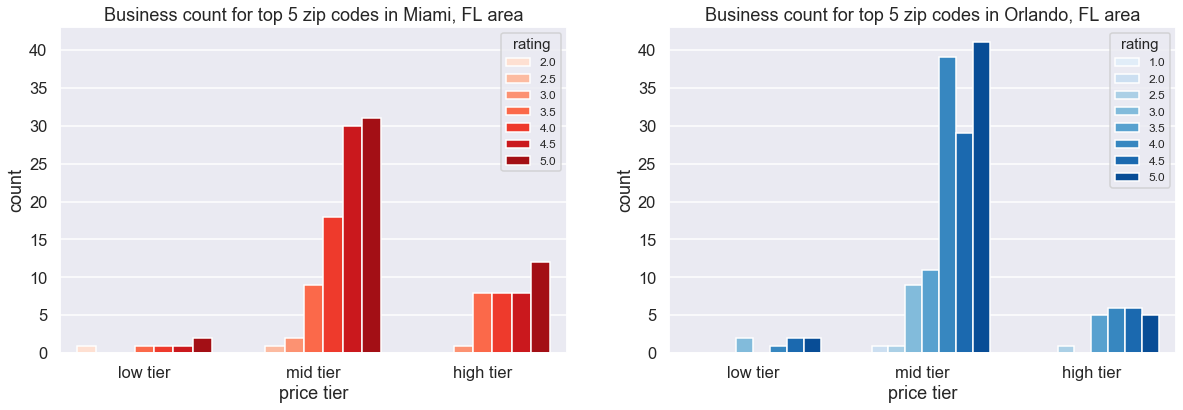

In [46]:
# break out prices by rating for top 5 zipcodes in Miami and Orlando
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
sns.countplot(x = 'price_tier', data = business_data[business_data['location_zipcode'].isin([33134,
                                                                        33139, 33143, 33176, 33155])],
              order = ['low_tier', 'mid_tier', 'high_tier'], ax = ax[0],
             hue = 'rating', palette = 'Reds', saturation = 1)
sns.countplot(x = 'price_tier', data = business_data[business_data['location_zipcode'].isin([32789,
                                                                        32819, 32803, 32746, 32765])],
              order = ['low_tier', 'mid_tier', 'high_tier'], ax = ax[1],
             hue = 'rating', palette = 'Blues', saturation = 1)
ax[0].set_title('Business count for top 5 zip codes in Miami, FL area')
ax[0].set_xlabel('price tier')
ax[0].set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax[0].legend(fontsize = 12, title = 'rating', title_fontsize='15')
ax[0].set_ylim(0, 43)
ax[1].set_title('Business count for top 5 zip codes in Orlando, FL area')
ax[1].set_xlabel('price tier')
ax[1].set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax[1].legend(fontsize = 12, title = 'rating', title_fontsize='15')
ax[1].set_ylim(0, 43);

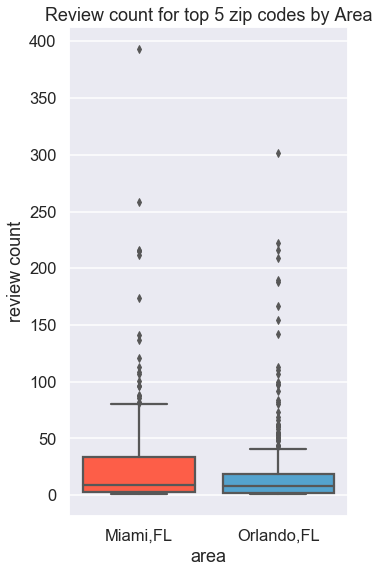

In [47]:
# review_count for businesses in top 5 zipcodes in Miami and Orlando
fig, ax = plt.subplots(figsize = (5, 9))
sns.boxplot(x = 'area', y = 'review_count', data = business_data[business_data['location_zipcode'].isin([33134,
            33139, 33143, 33176, 33155, 32789, 32819, 32803, 32746, 32765])],
            palette = ['#fd5e48', '#54a3ce'], saturation = 1, ax = ax)
ax.set_title('Review count for top 5 zip codes by Area')
ax.set_ylabel('review count');

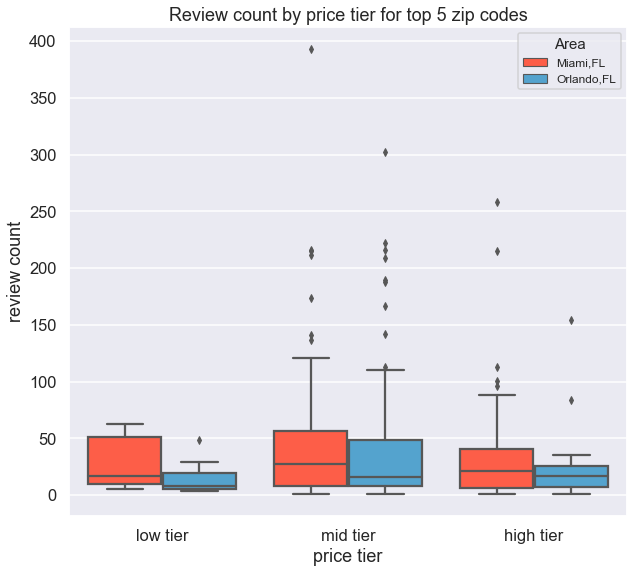

In [48]:
# review_count by price_tier for businesses in top 5 zipcodes in Miami and Orlando
fig, ax = plt.subplots(figsize = (10, 9))
sns.boxplot(x = 'price_tier', y = 'review_count', data = business_data[business_data['location_zipcode'].isin([33134,
            33139, 33143, 33176, 33155, 32789, 32819, 32803, 32746, 32765])], hue = 'area',
            palette = ['#fd5e48', '#54a3ce'], saturation = 1, ax = ax,
           order = ['low_tier', 'mid_tier', 'high_tier'])
ax.set_title('Review count by price tier for top 5 zip codes')
ax.set_xlabel('price tier')
ax.set_ylabel('review count')
ax.set_xticklabels(['low tier', 'mid tier', 'high tier'])
ax.legend(fontsize = 12, title = 'Area', title_fontsize='15');

## Summary
    Miami and Orlando are very similar metro areas, which both currently support a bustling spa industry.

    However, while both locations show opportunity for market growth in the high-end tier of the spa market, Orlando's higher average median income makes it a more viable option to open a new business.